In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])
mean_02=np.array([4,5])
cov_02=np.array([[1.21,0.1],[0.1,1.3]])
#normal Distribution
dist1=np.random.multivariate_normal(mean_01,cov_01,500)
dist2=np.random.multivariate_normal(mean_02,cov_02,500)
print(dist1.shape)
print(dist2.shape)

(500, 2)
(500, 2)


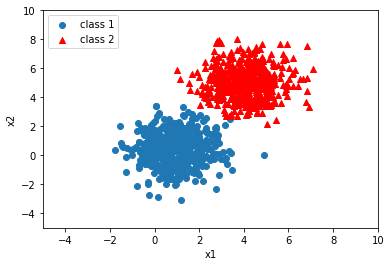

In [3]:
plt.figure(0)
plt.scatter(dist1[:,0],dist1[:,1],label='class 1')
plt.scatter(dist2[:,0],dist2[:,1],color='r',marker='^',label='class 2')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()


In [4]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
data[500:,-1]=1.0

In [5]:
np.random.shuffle(data)

In [6]:
split = int(0.8*data.shape[0])

In [7]:
x_train=data[:split,:-1]
x_test=data[split:,:-1]
y_train=data[:split,-1]
y_test=data[split:,-1]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


In [8]:
def hypothesis(x,w,b):
    h=np.dot(x,w)+b
    return sigmoid(h)
def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))
def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*(np.log2(hx))+(1-y_true[i])*(np.log2(1-hx))
    return -err/m
def gradeint(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)
    return [grad_w/m,grad_b/m]
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=gradeint(y_true,x,w,b)
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    return err,w,b
def prediction(x,w,h):
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1
def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    for i in range(y_tst.shape[0]):
        p=prediction(x_tst[i],w,b)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    return ((y_pred==y_tst).sum())/y_tst.shape[0]


In [9]:
loss=[]
accuracy=[]
w=2*np.random.random((x_train.shape[1],))
b=5*np.random.random()
for x in range(100):
    l,w,b=grad_descent(x_train,y_train,w,b,learning_rate=0.5)
    accuracy.append(get_acc(x_test,y_test,w,b))
    loss.append(l)

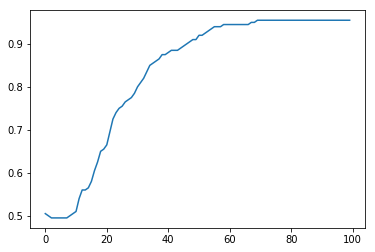

In [10]:
plt.plot(accuracy)
plt.show()


Text(0, 0.5, 'neagtive of log likelihood')

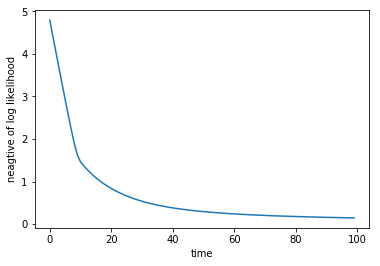

In [11]:
plt.plot(loss)
plt.xlabel('time')
plt.ylabel('neagtive of log likelihood')

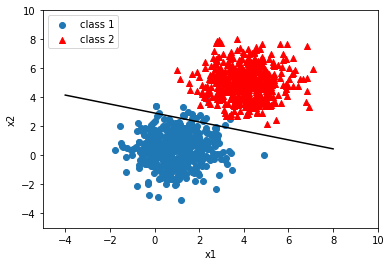

In [12]:
plt.figure(0)
plt.scatter(dist1[:,0],dist1[:,1],label='class 1')
plt.scatter(dist2[:,0],dist2[:,1],color='r',marker='^',label='class 2')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
x=np.linspace(-4,8,10)
y=-(w[0]*x+b)/w[1]
plt.plot(x,y,color='k')
plt.legend()
plt.show()


In [13]:
print(w,b)


[0.33832259 1.09444339] -3.1943113013409334
